## Gagan Chordia

**Polynomial Regression**

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class PolynomialRegression():
    def __init__(self, degree=2, iterations=5):
        self.degree = degree
        self.iterations = iterations
        
    def transform(self, x):
        x_transform = np.ones((self.m, 1))
        
        for ii in range(0, self.degree + 1):
            if(ii != 0):
                x_power = np.power(x, ii)
                x_transform = np.append(x_transform, x_power.reshape(-1, 1), axis=1)
        return x_transform
    
    def normalize(self, x):
        x[:, 1:] = (x[:, 1:] - np.mean(x[:, 1:], axis = 0)) / np.std(x[:, 1:], axis=0)
        return x
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        self.m, self.n = self.x.shape
        self.w = np.zeros(self.degree + 1)
        
        x_transform = self.transform(self.x)
        x_normalize = self.normalize(x_transform)
        
        for i in range(self.iterations):
            h = self.predict(self.x)
            error = h - self.y
            
            self.w = self.w - (1/self.m) * np.dot(x_transform.T, error)
        
        return self
    
    def predict(self, x):
        x_transform = self.transform(x)
        x_normalize = self.normalize(x_transform)
        return np.dot(x_transform, self.w)

In [3]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [4]:
model = PolynomialRegression(degree=3)
model.fit(x, y)
y_pred = model.predict(x)
y_pred

array([-8417630.73989715, -7343757.91191554, -6029654.54959998,
       -4429990.33857083, -2499434.96444845,  -192658.11285318,
        2535670.53059461,  5730881.28027457,  9438304.45056636,
       13703270.3558496 ])

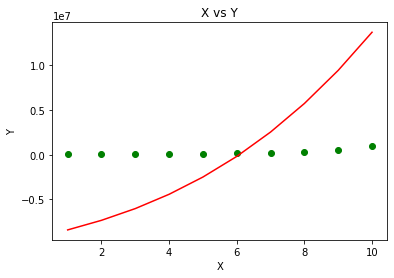

In [5]:
plt.scatter(x, y, color = 'green')
plt.plot(x, y_pred, color = 'red')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()